# KNN - Correntes de motor

Testando 30 rodadas com algoritmo **KNN** nos conjuntos de dados de correntes de motor com dados extraídos por _dwt_.

## Importando Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score

## Declarando funções

In [3]:
def load_correntes():
    '''Retorna os 3 arquivos carregados em um único array'''
    return np.append(
                arr=np.load("corrente1.npy"),
                axis=0,
                values=np.append(
                        arr=np.load("corrente2.npy"),
                        values=np.load("corrente3.npy"),
                        axis=0))

def binarize(matriz7x7):
    '''Recebe a matriz de confusão (7, 7) e retorna uma matriz (2, 2) com seus elementos agrupados'''
    mBinaria = np.array([[0, 0],[0, 0]])

    for linha in range(7):
        if linha == 0:
            mBinaria[0] = [matriz7x7[0][0], sum(matriz7x7[0][1:])]
        else:
            mBinaria[1] += [matriz7x7[linha][0], sum(matriz7x7[linha][1:])]

    return mBinaria

def normalize(line):
    '''Recebe uma linha da matriz e a retorna normalizada em relação ao total de elementos da linha'''
    total = sum(line)
    return np.array([x / total for x in line])

def test_30_knn(x, y, y_labels, k_vizinhos):
    '''
    Executa 30 rodadas com KNN, imprimindo o resultado da classificação e plotando a matriz de confusão.

    Ao final, retorna 3 listas, contendo a acurácia, a sensibilidade e a matriz de confusão (não normalizada) ao longo das 30 rodadas, respectivamente.
    '''
    # Armazena os resultados de acurácia, sensibilidade e matriz de confusão que ao final serão retornados
    irisAcc = []
    irisRec = []
    matrixProdada = []

    # Armazena as sementes já usadas para não haver repetição
    usedSeed = []

    for i in range(30):

        # Gerando inteiro aleatório para distribuição dos dados
        semente = randint(0, 8001)
        
        while semente in usedSeed:
            semente = randint(0, 8001)
        
        usedSeed.append(semente)

        # Separando dados para treino e teste
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=semente)

        # Instanciando classificador
        classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

        # Treinando modelo
        classifier.fit(X_train, y_train)

        # Realizando teste de classificação
        y_pred = classifier.predict(X_test)

        # Adicionando resultados à lista
        acc = accuracy_score(y_test, y_pred)
        irisAcc.append(acc)

        rec = recall_score(y_test, y_pred, average=None)
        irisRec.append(rec)

        matrixProdada.append(confusion_matrix(y_test, y_pred, normalize=None))

        # Exibindo resultados da rodada
        print(f"\n- RODADA {i} - Semente {semente} -\n")
        print("- Acurácia {accuracy} -\n- Sensibilidade {recall} -\n".format(accuracy=acc, recall=rec))

        print(classification_report(y_test, y_pred, target_names=y_labels))

        print("Matriz de confusão normalizada")
        plot_confusion_matrix(
            estimator=classifier,
            X=X_test,
            y_true=y_test,
            display_labels=y_labels,
            cmap=plt.cm.Blues,
            normalize='true'
        )
        plt.show()
    return irisAcc, irisRec, matrixProdada

## Características dos dados

| Características     |  Valor|
|:--------------------|------:|
| Classes             |      7|
| Amostras            |   7851|
| Dimensionalidade    |     38|

## Carregando dados e rótulos, e gerando _DataFrame_

In [4]:
# Carregando data
data = load_correntes()

# Carregando Rótulos
labels = [
    'DesvioD1','DesvioD2','DesvioD3','DesvioD4','DesvioD5','DesvioA5',
    'MeanAD1','MeanAD2','MeanAD3','MeanAD4','MeanAD5','MeanADA5',
    'MedianAD1','MedianAD2','MedianAD3','MedianAD4','MedianAD5','MedianADA5',
    'KurtosisD1','KurtosisD2','KurtosisD3','KurtosisD4','KurtosisD5','KurtosisA5',
    'SkewnessD1','SkewnessD2','SkewnessD3','SkewnessD4','SkewnessD5','SkewnessA5',
    'EnergiaD1','EnergiaD2','EnergiaD3','EnergiaD4','EnergiaD5','EnergiaA5',
    'frequencia','classe','carga'
]

target_labels = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

# Gerando DataFrame
chainDF = pd.DataFrame(data=data, columns=labels).fillna(value=0)

chainCompleteDF = chainDF.copy()

targetS = chainDF.pop('classe') # Removeu a coluna 'classe' de chainDF

## `chainDF`

`chainDF` é um _DataFrame_, uma tabela com o conjunto de dados carregados

In [5]:
chainDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DesvioD1,7851.0,0.011659,0.001102,0.000000,0.011175,0.011460,0.012027,0.018549
DesvioD2,7851.0,0.013451,0.001709,0.000000,0.012369,0.013052,0.014401,0.020684
DesvioD3,7851.0,0.017627,0.004701,0.000000,0.014061,0.016503,0.019949,0.036409
DesvioD4,7851.0,0.063597,0.030260,0.000000,0.040414,0.057861,0.080548,0.172226
DesvioD5,7851.0,0.310475,0.148925,0.000000,0.192664,0.282100,0.396623,0.832394
DesvioA5,7851.0,3.312243,0.809602,0.000000,2.556062,3.069992,4.180307,5.370829
MeanAD1,7851.0,0.009272,0.000859,0.000000,0.008899,0.009123,0.009574,0.011858
MeanAD2,7851.0,0.010695,0.001334,0.000000,0.009862,0.010388,0.011450,0.015411
MeanAD3,7851.0,0.014307,0.004020,0.000000,0.011258,0.013320,0.016239,0.031664
MeanAD4,7851.0,0.054659,0.025998,0.000000,0.034660,0.049756,0.069357,0.150451


## `targetS`

`targetS` é apenas o que seria uma coluna, o que é chamado de _series_.

## Observando distribuição de classes

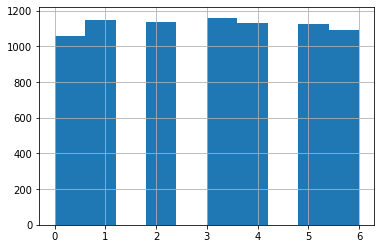

In [6]:
targetS.hist()

## Realizando 30 rodadas de Teste com KNN


- RODADA 0 - Semente 6901 -

- Acurácia 0.7058573853989814 -
- Sensibilidade [0.69648562 0.57099698 0.66765579 0.79564033 0.5407855  0.72853186
 0.93987342] -

              precision    recall  f1-score   support

      Normal       0.67      0.70      0.68       313
        HI-1       0.49      0.57      0.53       331
        HI-2       0.67      0.67      0.67       337
        HI-3       0.79      0.80      0.79       367
        LI-1       0.56      0.54      0.55       331
        LI-2       0.84      0.73      0.78       361
        LI-3       0.96      0.94      0.95       316

    accuracy                           0.71      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


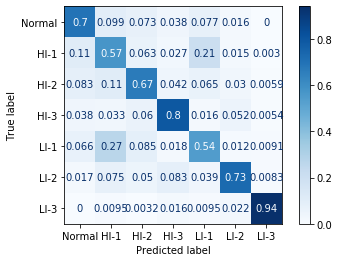


- RODADA 1 - Semente 3777 -

- Acurácia 0.716893039049236 -
- Sensibilidade [0.6993865  0.61341853 0.67919075 0.7797619  0.52616279 0.76162791
 0.9481268 ] -

              precision    recall  f1-score   support

      Normal       0.68      0.70      0.69       326
        HI-1       0.48      0.61      0.54       313
        HI-2       0.70      0.68      0.69       346
        HI-3       0.80      0.78      0.79       336
        LI-1       0.61      0.53      0.57       344
        LI-2       0.82      0.76      0.79       344
        LI-3       0.97      0.95      0.96       347

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


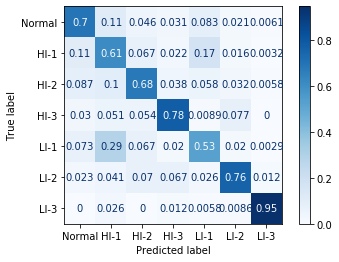


- RODADA 2 - Semente 4718 -

- Acurácia 0.7134974533106961 -
- Sensibilidade [0.73754153 0.56582633 0.67732558 0.74561404 0.53571429 0.80966767
 0.93043478] -

              precision    recall  f1-score   support

      Normal       0.68      0.74      0.71       301
        HI-1       0.52      0.57      0.54       357
        HI-2       0.69      0.68      0.68       344
        HI-3       0.79      0.75      0.77       342
        LI-1       0.59      0.54      0.56       336
        LI-2       0.78      0.81      0.80       331
        LI-3       0.98      0.93      0.95       345

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


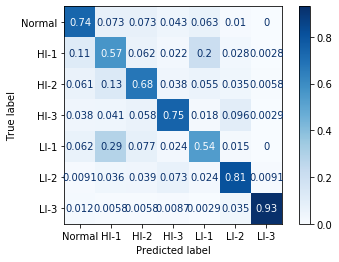


- RODADA 3 - Semente 3489 -

- Acurácia 0.7198641765704584 -
- Sensibilidade [0.71301775 0.58430233 0.66956522 0.79501385 0.5508982  0.784375
 0.95859873] -

              precision    recall  f1-score   support

      Normal       0.71      0.71      0.71       338
        HI-1       0.51      0.58      0.55       344
        HI-2       0.70      0.67      0.68       345
        HI-3       0.82      0.80      0.81       361
        LI-1       0.57      0.55      0.56       334
        LI-2       0.81      0.78      0.80       320
        LI-3       0.96      0.96      0.96       314

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


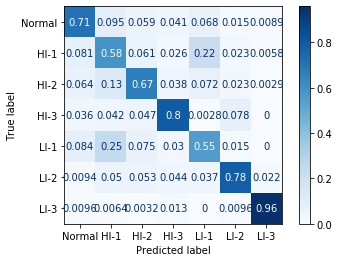


- RODADA 4 - Semente 4351 -

- Acurácia 0.7122241086587436 -
- Sensibilidade [0.72121212 0.55521472 0.66163142 0.77688172 0.55192878 0.78461538
 0.92537313] -

              precision    recall  f1-score   support

      Normal       0.70      0.72      0.71       330
        HI-1       0.49      0.56      0.52       326
        HI-2       0.69      0.66      0.67       331
        HI-3       0.80      0.78      0.79       372
        LI-1       0.57      0.55      0.56       337
        LI-2       0.80      0.78      0.79       325
        LI-3       0.97      0.93      0.95       335

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


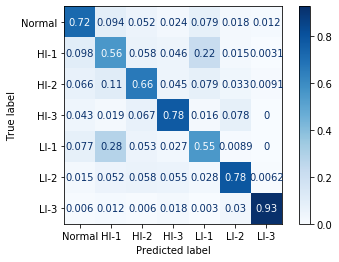


- RODADA 5 - Semente 4768 -

- Acurácia 0.7096774193548387 -
- Sensibilidade [0.73006135 0.65088757 0.64035088 0.78816199 0.47875354 0.75438596
 0.94311377] -

              precision    recall  f1-score   support

      Normal       0.68      0.73      0.70       326
        HI-1       0.51      0.65      0.57       338
        HI-2       0.65      0.64      0.65       342
        HI-3       0.80      0.79      0.80       321
        LI-1       0.63      0.48      0.54       353
        LI-2       0.78      0.75      0.77       342
        LI-3       0.98      0.94      0.96       334

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


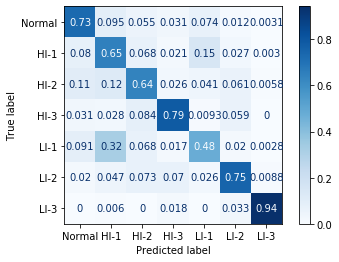


- RODADA 6 - Semente 5143 -

- Acurácia 0.7211375212224108 -
- Sensibilidade [0.69158879 0.63461538 0.69273743 0.81957187 0.50684932 0.78171091
 0.93712575] -

              precision    recall  f1-score   support

      Normal       0.70      0.69      0.69       321
        HI-1       0.46      0.63      0.54       312
        HI-2       0.73      0.69      0.71       358
        HI-3       0.79      0.82      0.80       327
        LI-1       0.65      0.51      0.57       365
        LI-2       0.83      0.78      0.80       339
        LI-3       0.96      0.94      0.95       334

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


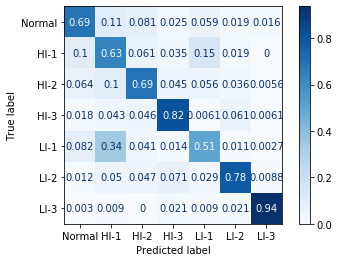


- RODADA 7 - Semente 7897 -

- Acurácia 0.7164685908319185 -
- Sensibilidade [0.73101266 0.62280702 0.68465909 0.78181818 0.52571429 0.74855491
 0.94375   ] -

              precision    recall  f1-score   support

      Normal       0.68      0.73      0.70       316
        HI-1       0.49      0.62      0.55       342
        HI-2       0.73      0.68      0.71       352
        HI-3       0.81      0.78      0.80       330
        LI-1       0.59      0.53      0.55       350
        LI-2       0.83      0.75      0.79       346
        LI-3       0.97      0.94      0.96       320

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


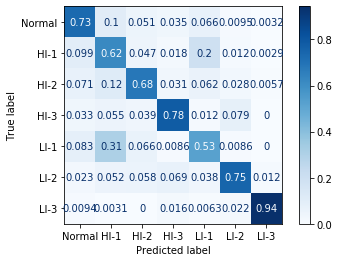


- RODADA 8 - Semente 2046 -

- Acurácia 0.7126485568760611 -
- Sensibilidade [0.69871795 0.57763975 0.71470588 0.76986301 0.5042735  0.79472141
 0.93230769] -

              precision    recall  f1-score   support

      Normal       0.70      0.70      0.70       312
        HI-1       0.48      0.58      0.52       322
        HI-2       0.68      0.71      0.69       340
        HI-3       0.84      0.77      0.81       365
        LI-1       0.58      0.50      0.54       351
        LI-2       0.80      0.79      0.80       341
        LI-3       0.94      0.93      0.94       325

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


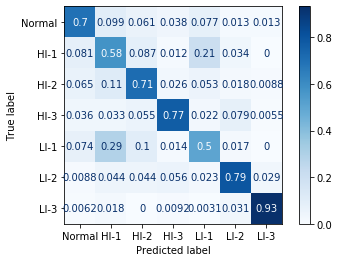


- RODADA 9 - Semente 7558 -

- Acurácia 0.7198641765704584 -
- Sensibilidade [0.7202381  0.60060976 0.66106443 0.74926254 0.55362319 0.82389937
 0.94294294] -

              precision    recall  f1-score   support

      Normal       0.71      0.72      0.71       336
        HI-1       0.50      0.60      0.54       328
        HI-2       0.70      0.66      0.68       357
        HI-3       0.79      0.75      0.77       339
        LI-1       0.60      0.55      0.57       345
        LI-2       0.82      0.82      0.82       318
        LI-3       0.99      0.94      0.96       333

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


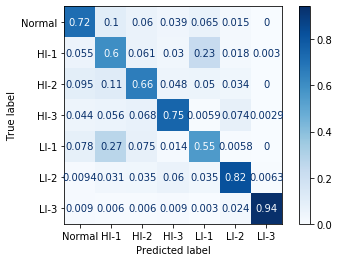


- RODADA 10 - Semente 4712 -

- Acurácia 0.7211375212224108 -
- Sensibilidade [0.66767372 0.58213256 0.70710059 0.7867036  0.55445545 0.78151261
 0.95924765] -

              precision    recall  f1-score   support

      Normal       0.70      0.67      0.68       331
        HI-1       0.54      0.58      0.56       347
        HI-2       0.71      0.71      0.71       338
        HI-3       0.78      0.79      0.79       361
        LI-1       0.51      0.55      0.53       303
        LI-2       0.85      0.78      0.81       357
        LI-3       0.98      0.96      0.97       319

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


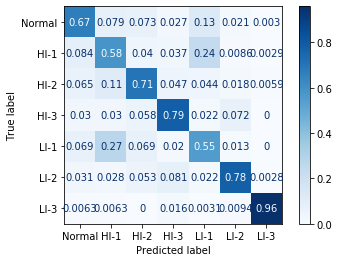


- RODADA 11 - Semente 3283 -

- Acurácia 0.7262308998302207 -
- Sensibilidade [0.71212121 0.59574468 0.66767372 0.79888268 0.56851312 0.79692308
 0.93823529] -

              precision    recall  f1-score   support

      Normal       0.69      0.71      0.70       330
        HI-1       0.54      0.60      0.56       329
        HI-2       0.69      0.67      0.68       331
        HI-3       0.81      0.80      0.80       358
        LI-1       0.57      0.57      0.57       343
        LI-2       0.83      0.80      0.81       325
        LI-3       0.98      0.94      0.96       340

    accuracy                           0.73      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada


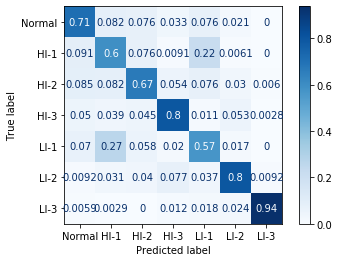


- RODADA 12 - Semente 1219 -

- Acurácia 0.7232597623089984 -
- Sensibilidade [0.68047337 0.60526316 0.6744868  0.79456193 0.57453416 0.79022989
 0.94011976] -

              precision    recall  f1-score   support

      Normal       0.70      0.68      0.69       338
        HI-1       0.52      0.61      0.56       342
        HI-2       0.72      0.67      0.69       341
        HI-3       0.82      0.79      0.81       331
        LI-1       0.54      0.57      0.56       322
        LI-2       0.85      0.79      0.82       348
        LI-3       0.98      0.94      0.96       334

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.73      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


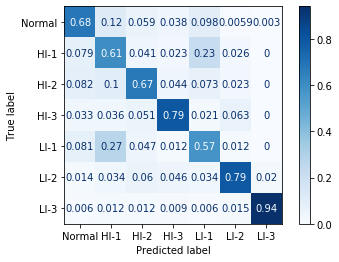


- RODADA 13 - Semente 4912 -

- Acurácia 0.7258064516129032 -
- Sensibilidade [0.71471471 0.57183099 0.74320242 0.78683386 0.5659824  0.77678571
 0.93255132] -

              precision    recall  f1-score   support

      Normal       0.70      0.71      0.71       333
        HI-1       0.53      0.57      0.55       355
        HI-2       0.72      0.74      0.73       331
        HI-3       0.76      0.79      0.77       319
        LI-1       0.60      0.57      0.58       341
        LI-2       0.84      0.78      0.81       336
        LI-3       0.97      0.93      0.95       341

    accuracy                           0.73      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada


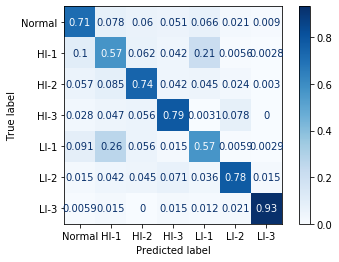


- RODADA 14 - Semente 6141 -

- Acurácia 0.7249575551782682 -
- Sensibilidade [0.71111111 0.56213018 0.75925926 0.79289941 0.52694611 0.7816092
 0.92479109] -

              precision    recall  f1-score   support

      Normal       0.64      0.71      0.68       315
        HI-1       0.51      0.56      0.54       338
        HI-2       0.69      0.76      0.72       324
        HI-3       0.80      0.79      0.80       338
        LI-1       0.60      0.53      0.56       334
        LI-2       0.85      0.78      0.81       348
        LI-3       0.98      0.92      0.95       359

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


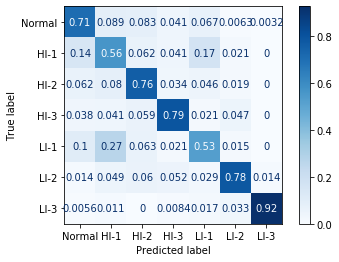


- RODADA 15 - Semente 7751 -

- Acurácia 0.7122241086587436 -
- Sensibilidade [0.71471471 0.55752212 0.67073171 0.80758017 0.55523256 0.76315789
 0.9235474 ] -

              precision    recall  f1-score   support

      Normal       0.70      0.71      0.71       333
        HI-1       0.47      0.56      0.51       339
        HI-2       0.72      0.67      0.69       328
        HI-3       0.80      0.81      0.80       343
        LI-1       0.56      0.56      0.56       344
        LI-2       0.83      0.76      0.79       342
        LI-3       0.98      0.92      0.95       327

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


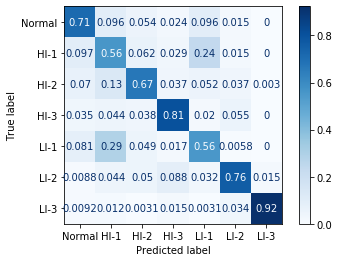


- RODADA 16 - Semente 4605 -

- Acurácia 0.7211375212224108 -
- Sensibilidade [0.75404531 0.54489164 0.66666667 0.77878788 0.57184751 0.78977273
 0.93841642] -

              precision    recall  f1-score   support

      Normal       0.67      0.75      0.71       309
        HI-1       0.50      0.54      0.52       323
        HI-2       0.70      0.67      0.68       360
        HI-3       0.79      0.78      0.78       330
        LI-1       0.60      0.57      0.59       341
        LI-2       0.82      0.79      0.80       352
        LI-3       0.98      0.94      0.96       341

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


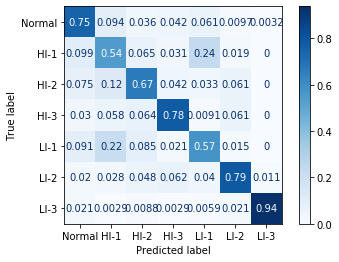


- RODADA 17 - Semente 3121 -

- Acurácia 0.7190152801358234 -
- Sensibilidade [0.74922601 0.54360465 0.72443182 0.77409639 0.53153153 0.76876877
 0.9439528 ] -

              precision    recall  f1-score   support

      Normal       0.68      0.75      0.71       323
        HI-1       0.51      0.54      0.53       344
        HI-2       0.67      0.72      0.70       352
        HI-3       0.82      0.77      0.80       332
        LI-1       0.56      0.53      0.55       333
        LI-2       0.85      0.77      0.81       333
        LI-3       0.99      0.94      0.97       339

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


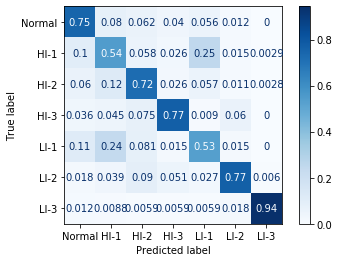


- RODADA 18 - Semente 4835 -

- Acurácia 0.7207130730050934 -
- Sensibilidade [0.71856287 0.57538462 0.7223796  0.76676385 0.51796407 0.78106509
 0.96048632] -

              precision    recall  f1-score   support

      Normal       0.71      0.72      0.71       334
        HI-1       0.49      0.58      0.53       325
        HI-2       0.71      0.72      0.72       353
        HI-3       0.78      0.77      0.77       343
        LI-1       0.59      0.52      0.55       334
        LI-2       0.84      0.78      0.81       338
        LI-3       0.95      0.96      0.96       329

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


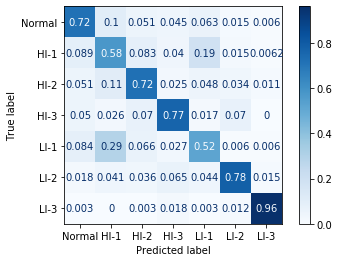


- RODADA 19 - Semente 6866 -

- Acurácia 0.7079796264855688 -
- Sensibilidade [0.73573574 0.52421652 0.67834395 0.77142857 0.56432749 0.76666667
 0.9379085 ] -

              precision    recall  f1-score   support

      Normal       0.71      0.74      0.72       333
        HI-1       0.50      0.52      0.51       351
        HI-2       0.63      0.68      0.65       314
        HI-3       0.79      0.77      0.78       350
        LI-1       0.57      0.56      0.57       342
        LI-2       0.84      0.77      0.80       360
        LI-3       0.97      0.94      0.95       306

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


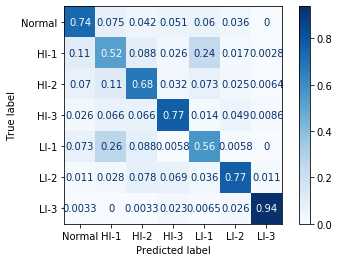


- RODADA 20 - Semente 7090 -

- Acurácia 0.7143463497453311 -
- Sensibilidade [0.72555205 0.58600583 0.67484663 0.76963351 0.52212389 0.77477477
 0.95886076] -

              precision    recall  f1-score   support

      Normal       0.66      0.73      0.69       317
        HI-1       0.51      0.59      0.54       343
        HI-2       0.69      0.67      0.68       326
        HI-3       0.82      0.77      0.79       382
        LI-1       0.59      0.52      0.55       339
        LI-2       0.81      0.77      0.79       333
        LI-3       0.98      0.96      0.97       316

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


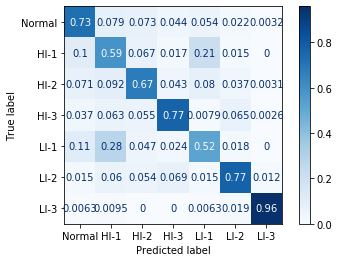


- RODADA 21 - Semente 4235 -

- Acurácia 0.7101018675721562 -
- Sensibilidade [0.70529801 0.58591549 0.7120743  0.78735632 0.46884273 0.77374302
 0.93993994] -

              precision    recall  f1-score   support

      Normal       0.73      0.71      0.72       302
        HI-1       0.50      0.59      0.54       355
        HI-2       0.68      0.71      0.70       323
        HI-3       0.82      0.79      0.80       348
        LI-1       0.50      0.47      0.48       337
        LI-2       0.83      0.77      0.80       358
        LI-3       0.96      0.94      0.95       333

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


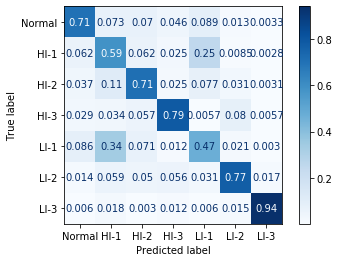


- RODADA 22 - Semente 6700 -

- Acurácia 0.7287775891341256 -
- Sensibilidade [0.71301775 0.59356725 0.72340426 0.78356164 0.56456456 0.79878049
 0.93146417] -

              precision    recall  f1-score   support

      Normal       0.74      0.71      0.73       338
        HI-1       0.53      0.59      0.56       342
        HI-2       0.72      0.72      0.72       329
        HI-3       0.82      0.78      0.80       365
        LI-1       0.56      0.56      0.56       333
        LI-2       0.80      0.80      0.80       328
        LI-3       0.99      0.93      0.96       321

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


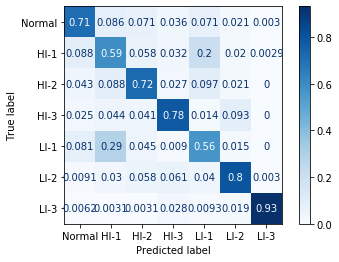


- RODADA 23 - Semente 7302 -

- Acurácia 0.7198641765704584 -
- Sensibilidade [0.73701299 0.58055556 0.70914127 0.78735632 0.52959502 0.76875
 0.92899408] -

              precision    recall  f1-score   support

      Normal       0.69      0.74      0.71       308
        HI-1       0.53      0.58      0.55       360
        HI-2       0.71      0.71      0.71       361
        HI-3       0.78      0.79      0.78       348
        LI-1       0.56      0.53      0.54       321
        LI-2       0.86      0.77      0.81       320
        LI-3       0.97      0.93      0.95       338

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


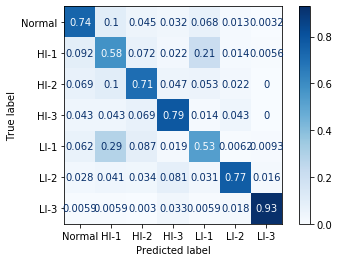


- RODADA 24 - Semente 3114 -

- Acurácia 0.716044142614601 -
- Sensibilidade [0.70096463 0.54654655 0.74922601 0.8        0.5433526  0.74260355
 0.92      ] -

              precision    recall  f1-score   support

      Normal       0.69      0.70      0.69       311
        HI-1       0.48      0.55      0.51       333
        HI-2       0.70      0.75      0.72       323
        HI-3       0.79      0.80      0.79       355
        LI-1       0.59      0.54      0.57       346
        LI-2       0.84      0.74      0.79       338
        LI-3       0.97      0.92      0.94       350

    accuracy                           0.72      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


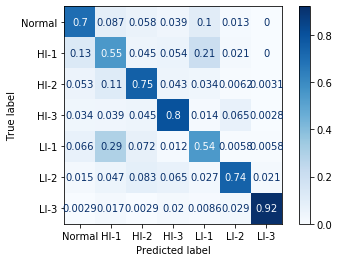


- RODADA 25 - Semente 673 -

- Acurácia 0.7215619694397284 -
- Sensibilidade [0.69871795 0.58479532 0.68085106 0.80769231 0.55102041 0.78590786
 0.94736842] -

              precision    recall  f1-score   support

      Normal       0.64      0.70      0.67       312
        HI-1       0.52      0.58      0.55       342
        HI-2       0.71      0.68      0.70       329
        HI-3       0.80      0.81      0.80       338
        LI-1       0.61      0.55      0.58       343
        LI-2       0.83      0.79      0.81       369
        LI-3       0.96      0.95      0.95       323

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


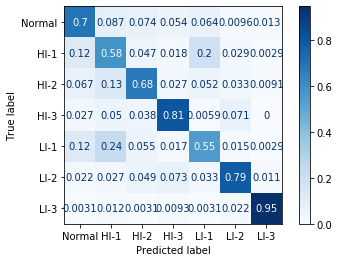


- RODADA 26 - Semente 2808 -

- Acurácia 0.7236842105263158 -
- Sensibilidade [0.68421053 0.54461538 0.71091445 0.81111111 0.51661631 0.81564246
 0.971875  ] -

              precision    recall  f1-score   support

      Normal       0.67      0.68      0.68       323
        HI-1       0.51      0.54      0.53       325
        HI-2       0.70      0.71      0.70       339
        HI-3       0.80      0.81      0.80       360
        LI-1       0.56      0.52      0.54       331
        LI-2       0.85      0.82      0.83       358
        LI-3       0.98      0.97      0.97       320

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


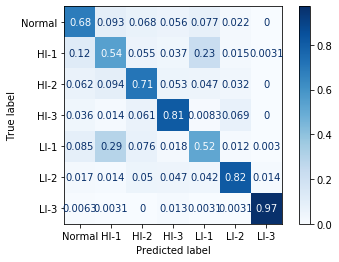


- RODADA 27 - Semente 4435 -

- Acurácia 0.7215619694397284 -
- Sensibilidade [0.69204152 0.61126761 0.70752089 0.75862069 0.58507463 0.76704545
 0.94025157] -

              precision    recall  f1-score   support

      Normal       0.70      0.69      0.70       289
        HI-1       0.52      0.61      0.56       355
        HI-2       0.73      0.71      0.72       359
        HI-3       0.80      0.76      0.78       348
        LI-1       0.60      0.59      0.59       335
        LI-2       0.80      0.77      0.78       352
        LI-3       0.97      0.94      0.96       318

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.73      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


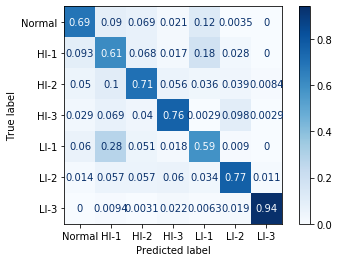


- RODADA 28 - Semente 1494 -

- Acurácia 0.7241086587436333 -
- Sensibilidade [0.68562874 0.58715596 0.75510204 0.8313253  0.51742627 0.79518072
 0.93015873] -

              precision    recall  f1-score   support

      Normal       0.73      0.69      0.71       334
        HI-1       0.48      0.59      0.53       327
        HI-2       0.73      0.76      0.74       343
        HI-3       0.81      0.83      0.82       332
        LI-1       0.58      0.52      0.55       373
        LI-2       0.84      0.80      0.82       332
        LI-3       0.95      0.93      0.94       315

    accuracy                           0.72      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


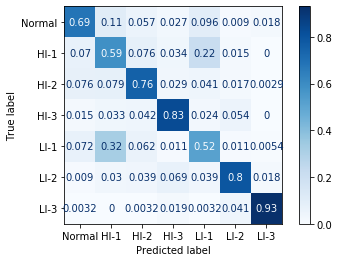


- RODADA 29 - Semente 1555 -

- Acurácia 0.716893039049236 -
- Sensibilidade [0.69354839 0.60117302 0.66022099 0.79836512 0.53642384 0.80059524
 0.90532544] -

              precision    recall  f1-score   support

      Normal       0.68      0.69      0.68       310
        HI-1       0.51      0.60      0.55       341
        HI-2       0.72      0.66      0.69       362
        HI-3       0.83      0.80      0.81       367
        LI-1       0.55      0.54      0.55       302
        LI-2       0.78      0.80      0.79       336
        LI-3       0.98      0.91      0.94       338

    accuracy                           0.72      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


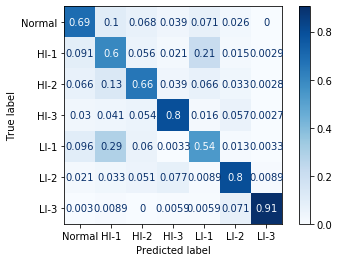

In [7]:
accuracy, recall, confusion = test_30_knn(x=chainDF.values, y=targetS.values, y_labels=target_labels, k_vizinhos=5)

## Gerando DataFrame de Acurácia e Sensibilidade por rodada

In [8]:
metricDF = pd.DataFrame(
    data=recall,
    columns=[f'S - {name}' for name in target_labels])

metricDF['Acurácia'] = accuracy
metricDF

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
0,0.696486,0.570997,0.667656,0.795640,0.540785,0.728532,0.939873,0.705857
1,0.699387,0.613419,0.679191,0.779762,0.526163,0.761628,0.948127,0.716893
2,0.737542,0.565826,0.677326,0.745614,0.535714,0.809668,0.930435,0.713497
3,0.713018,0.584302,0.669565,0.795014,0.550898,0.784375,0.958599,0.719864
4,0.721212,0.555215,0.661631,0.776882,0.551929,0.784615,0.925373,0.712224
5,0.730061,0.650888,0.640351,0.788162,0.478754,0.754386,0.943114,0.709677
6,0.691589,0.634615,0.692737,0.819572,0.506849,0.781711,0.937126,0.721138
7,0.731013,0.622807,0.684659,0.781818,0.525714,0.748555,0.943750,0.716469
8,0.698718,0.577640,0.714706,0.769863,0.504274,0.794721,0.932308,0.712649
9,0.720238,0.600610,0.661064,0.749263,0.553623,0.823899,0.942943,0.719864


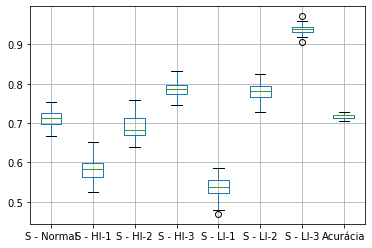

In [9]:
metricDF.boxplot()

In [10]:
metricDF.describe()

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.711121,0.582021,0.694882,0.786505,0.538036,0.779720,0.939171,0.718251
std,0.020809,0.028635,0.031534,0.019245,0.027327,0.021057,0.013758,0.005812
min,0.667674,0.524217,0.640351,0.745614,0.468843,0.728532,0.905325,0.705857
25%,0.697044,0.563054,0.669857,0.774793,0.523021,0.767472,0.930692,0.713710
50%,0.712569,0.583217,0.682755,0.787095,0.538605,0.781561,0.939145,0.719864
75%,0.724467,0.599393,0.714048,0.797684,0.555038,0.793599,0.943902,0.721562
max,0.754045,0.650888,0.759259,0.831325,0.585075,0.823899,0.971875,0.728778


## Gerando _DataFrame_ da matriz de confusão por rodada

In [11]:
confusion_resized = np.resize(confusion, (30, 49))

confusion_labels = [f"T {truelabel} x P {predlabel}" for truelabel in target_labels for predlabel in target_labels]

confusionTurnDF = pd.DataFrame(
    data=confusion_resized,
    columns=confusion_labels
)

confusionTurnDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T Normal x P Normal,30.0,228.533333,10.846049,200.0,221.00,229.5,238.00,245.0
T Normal x P HI-1,30.0,29.800000,4.245891,22.0,26.25,30.5,32.00,39.0
T Normal x P HI-2,30.0,19.866667,3.674078,11.0,18.00,20.0,22.75,26.0
T Normal x P HI-3,30.0,12.133333,2.956388,6.0,10.00,12.0,13.75,18.0
T Normal x P LI-1,30.0,24.633333,5.962430,17.0,21.00,23.5,26.75,43.0
T Normal x P LI-2,30.0,5.000000,2.259081,1.0,3.25,5.0,7.00,12.0
T Normal x P LI-3,30.0,1.433333,1.695498,0.0,0.00,1.0,2.00,6.0
T HI-1 x P Normal,30.0,32.466667,6.420513,18.0,29.00,32.5,36.00,49.0
T HI-1 x P HI-1,30.0,196.466667,11.461279,176.0,187.50,197.5,203.00,220.0
T HI-1 x P HI-2,30.0,21.133333,4.023494,14.0,19.00,21.0,23.00,31.0


## Matriz de confusão média

In [12]:
# Matriz com o somatório das 30 matrizes de confusão
confusion_sum = sum(confusion)

# Matriz com média aritmética das 30 marizes de confusão 
confusion_mean = [[x / 30 for x in line] for line in confusion_sum]

confusionDF = pd.DataFrame(
    data=confusion_mean,
    columns=[f'P - {label}' for label in target_labels],
    index=[f'True - {label}' for label in target_labels]
)

confusionDF

,P - Normal,P - HI-1,P - HI-2,P - HI-3,P - LI-1,P - LI-2,P - LI-3
True - Normal,228.533333,29.800000,19.866667,12.133333,24.633333,5.000000,1.433333
True - HI-1,32.466667,196.466667,21.133333,9.466667,71.333333,6.033333,0.733333
True - HI-2,23.100000,36.800000,236.600000,13.066667,19.500000,10.100000,1.433333
True - HI-3,11.700000,14.566667,19.233333,272.833333,4.400000,23.600000,0.600000
True - LI-1,27.833333,95.500000,22.466667,5.666667,181.800000,4.166667,0.666667
True - LI-2,5.366667,14.100000,18.366667,22.400000,10.733333,265.800000,4.233333
True - LI-3,1.933333,2.900000,0.900000,4.666667,2.000000,7.766667,310.166667


## Matriz de confusão média normalizada

In [13]:
confusionNormDF = pd.DataFrame(
    data=[normalize(row) for row in confusion_mean],
    columns=[f'P - {label}' for label in target_labels],
    index=[f'True - {label}' for label in target_labels]
)

confusionNormDF

,P - Normal,P - HI-1,P - HI-2,P - HI-3,P - LI-1,P - LI-2,P - LI-3
True - Normal,0.711056,0.092719,0.061813,0.037752,0.076644,0.015557,0.004460
True - HI-1,0.096160,0.581894,0.062593,0.028038,0.211275,0.017869,0.002172
True - HI-2,0.067821,0.108045,0.694656,0.038364,0.057252,0.029654,0.004208
True - HI-3,0.033724,0.041987,0.055438,0.786414,0.012683,0.068025,0.001729
True - LI-1,0.082323,0.282461,0.066450,0.016760,0.537711,0.012324,0.001972
True - LI-2,0.015738,0.041349,0.053861,0.065689,0.031476,0.779472,0.012414
True - LI-3,0.005853,0.008779,0.002725,0.014127,0.006054,0.023512,0.938951


## Gerando _DataFrame_ da matriz de confusão binarizada por rodada

In [14]:
confusionBinary = [binarize(matrix) for matrix in confusion]

confusionBinaryDF = pd.DataFrame(
    data=np.resize(confusionBinary, (30, 4)),
    columns=['true normal', 'false fail','false normal', 'true fail']
)

confusionBinaryDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
true normal,30.0,228.533333,10.846049,200.0,221.00,229.5,238.0,245.0
false fail,30.0,92.866667,7.912161,76.0,88.25,94.0,96.5,110.0
false normal,30.0,102.400000,10.720911,80.0,97.25,102.5,107.5,124.0
true fail,30.0,1932.200000,16.106114,1917.0,1921.00,1925.0,1938.5,1981.0


## Matriz de confusão binarizada média

In [15]:
# Matriz com o somatório das 30 matrizes de confusão
confusion_binary_sum = sum(confusionBinary)

# Matriz com média aritmética das 30 marizes de confusão 
confusion_binary_mean = [[x / 30 for x in line] for line in confusion_binary_sum]

confusionBDF = pd.DataFrame(
    data=confusion_binary_mean,
    columns=['Pred-Normal', 'Pred-Fail'],
    index=['True-Normal', 'True-Fail']
)

confusionBDF

,Pred-Normal,Pred-Fail
True-Normal,228.533333,92.866667
True-Fail,102.400000,1932.200000


## Matriz de confusão binarizada média normalizada

In [16]:
confusionBDF = pd.DataFrame(
    data=[normalize(row) for row in confusion_binary_mean],
    columns=['Pred-Normal', 'Pred-Fail'],
    index=['True-Normal', 'True-Fail']
)

confusionBDF

,Pred-Normal,Pred-Fail
True-Normal,0.711056,0.288944
True-Fail,0.050329,0.949671
